# Ⅲ．社会人のためのPython活用術・活用


## 1. ビジネスデータの作法

### データへのアプローチ
これまでPythonとJupyter notebookを活用してちょっとした計算やプログラムを利用できるようになりましたが，さらにデータを本格的に扱えるようにします．一般的にまとまったデータはExcelなどのスプレッドシートによって表形式のフォームにまとめられます．
表形式のデータはPythonの配列を使って処理することができますが，実はさらに便利な道具が用意されています．それらの道具はPython標準ライブラリーには入っていませんが，Anacondaに付属するライブラリーにあります．そして，それらはimport文で取り込むだけで標準ライブラリーと同様に利用することができます．

Pythonが機械学習や人工知能の研究者によって利用されるようになって，データを扱うための有益なライブラリーが数多く開発されています．そして，それらのライブラリーを使用することがPythonによる開発では標準となっています．それらのライブラリーは機械学習のような高度な処理に特化しているのではなく，一般的なデータ処理で大変役に立ちます．日常業務の中で活用すれば，日頃のデータ処理の品質が向上することは間違いありません．

### 表形式のデータ
一般の業務ではスプレッドシートで扱える範囲の大きさのデータを扱うことが殆どで，通常はExcelなどで表形式にまとめて管理されます．
この課題では，100名の性別，年齢，血液型，身長，体重を扱うことにします．
下表は，その一部を表示したものです．データはCSVファイルとして提供されます．

| person | gender | age | blood | height | weight |
| :---: | :---: | :---: | :---: | :---: | :---: |
| p001 | female | 30 | A | 152.7 | 51.5 |
| p002 | female | 56 | O | 155.3 | 52.7 |
| p003 | female | 40 | A | 157.3 | 58.9 |
| ...  |        |    |   |       |      |
| p100 | male   | 21 | B | 174.0 | 66.3 |

ここで，1行が1人の方に付属する情報となり，列ごとに同じ質のデータが記載されています．
- person ：各個人につけたID．
- gender ：性別を男性を「male」，女性を「female」で記載してあります．
- age ：年齢．
- blood ：血液型で、文字としてA，B，O，ABと記載してあります．
- height ：身長（cm）を小数点1桁まで記載してあります．
- weight ：体重（Kg）を小数点1桁まで記載してあります．

私たちは，このCSVデータをファイルから取り込んで標準的な統計分析を行います．

*****
### データ基礎分析の例
このデータについての基礎分析を行うプロセスをお見せします．
ここでは，最終的に出来るようになることを紹介ています．まだ理解できないことが出てきますが，これらの内容について順を追って説明していきますので，とりあえずは結果だけをご確認ください．

#### ライブラリーの搬入
重要なライブラリーであるnumpy，pandas，matplotlibを使用できるように取り込んでいます．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### CSVファイルの読み込み
事前に用意したCSVファイルを読み込んで，データフレームに代入しています．

In [2]:
sourceFile ='./data/persons_attributes.csv'
df = pd.read_csv(sourceFile)

df.head(5)

,person,gender,age,blood,height,weight
0,p001,female,30,A,152.7,51.5
1,p002,female,56,O,155.3,52.7
2,p003,female,40,A,157.3,58.9
3,p004,male,36,O,165.5,59.6
4,p005,female,25,O,161.2,58.2


#### 基本統計
数値データについて，基本統計を求めています．

In [3]:
df.describe()       # summmary statistic

,age,height,weight
count,100.0000,100.000000,100.000000
mean,37.3500,170.831000,64.936000
std,12.0289,7.252763,6.644957
min,20.0000,152.700000,49.500000
25%,27.7500,165.575000,60.300000
50%,36.0000,170.700000,64.550000
75%,48.0000,175.600000,68.900000
max,59.0000,187.700000,81.300000


#### 相関係数
数値データ間の相関係数を求めています．

In [4]:
df.corr()           # correlation

,age,height,weight
age,1.000000,0.051211,-0.022274
height,0.051211,1.000000,0.761320
weight,-0.022274,0.761320,1.000000


#### ヒストグラム
数値データについて，ヒストグラムを作成して表示しています．

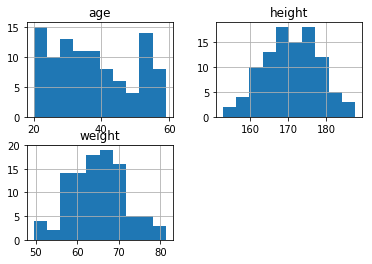

In [5]:
df.hist()           # histgram
plt.show()

#### 散布図
数値データ間の散布図を求めて，表示しています．

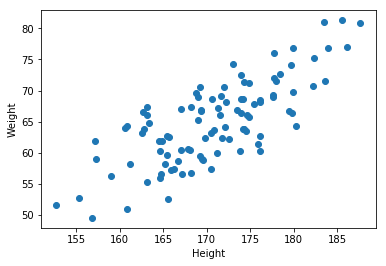

In [6]:
plt.scatter(df['height'],df['weight'])          # scatter
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 階級化
数値データを離散値に階級化しています.

In [7]:
df['ageClass'] = round(df.age-5,-1)
df['heightClass'] = np.int64(round(2*df.height,-1)/2)
df['weightClass'] = np.int64(round(2*df.weight,-1)/2)

#### 度数分布表
度数分布表を求めています．

In [8]:
df.gender.value_counts()

male      55
female    45
Name: gender, dtype: int64

In [9]:
df.blood.value_counts().sort_index()

A     41
AB     9
B     16
O     34
Name: blood, dtype: int64

In [10]:
df.ageClass.value_counts().sort_index()

20    36
30    24
40    17
50    23
Name: ageClass, dtype: int64

In [11]:
df.heightClass.value_counts().sort_index()

155     5
160     5
165    23
170    26
175    21
180    14
185     5
190     1
Name: heightClass, dtype: int64

In [12]:
df.weightClass.value_counts().sort_index()

50     4
55    10
60    23
65    30
70    22
75     8
80     3
Name: weightClass, dtype: int64

#### クロス集計表
離散値データに基づいて，クロス集計を行っています．

In [13]:
pivotAgeGender = df.pivot_table(values="person",index="ageClass",columns="gender",aggfunc='count',fill_value=0,margins=True)
pivotAgeGender

gender,female,male,All
ageClass,,,
20,21.0,15.0,36.0
30,8.0,16.0,24.0
40,5.0,12.0,17.0
50,11.0,12.0,23.0
All,45.0,55.0,100.0


列ごとの合計値による相対度数を求めています．

In [14]:
pivotAgeGender.div(pivotAgeGender.loc['All'],axis=1)

gender,female,male,All
ageClass,,,
20,0.466667,0.272727,0.36
30,0.177778,0.290909,0.24
40,0.111111,0.218182,0.17
50,0.244444,0.218182,0.23
All,1.000000,1.000000,1.00


行ごとの合計値による相対度数を求めています.

In [15]:
pivotAgeGender.div(pivotAgeGender['All'],axis=0)

gender,female,male,All
ageClass,,,
20,0.583333,0.416667,1.0
30,0.333333,0.666667,1.0
40,0.294118,0.705882,1.0
50,0.478261,0.521739,1.0
All,0.450000,0.550000,1.0


全体合計による相対度数を求めています．

In [16]:
pivotAgeGender.div(pivotAgeGender['All']['All'])

gender,female,male,All
ageClass,,,
20,0.21,0.15,0.36
30,0.08,0.16,0.24
40,0.05,0.12,0.17
50,0.11,0.12,0.23
All,0.45,0.55,1.00


このようにデータ基礎分析では，データをデータフレームに格納して分析を行います．
データ分析の作法として，下記の基礎的な統計処理を行います．

- 各数値データについて，基礎統計情報をとります．
- 数値データ間の相関係数を求めます．
- 各数値データについて，ヒストグラムを作成します．
- 数値データ間の散布図を作成します．
- 数値データに階級を導入して離散化したデータを作成します．
- 離散化したデータにより度数分布表を作成します．
- 離散化したデータによりクロス集計表を作成します．
- クロス集計表から各種の相対度数を求めます．

データを入手したら，このようにしてデータの特性を調査します．ビジネスにおいてデータ分析の80%はこのような基礎分析を正しく行うことで次のアクションに繋げることができます．
*****